STEPS

1. Importing Modules

2. Loading and Preprocessing the Dataset:
    Reading Data:
        Loads a CSV file containing news articles and their labels (fake or reliable).
        Stores data in a pandas DataFrame.
    Handling Missing Values:
        Fills null values with empty strings.
    Dropping Unnecessary Columns:
        Keeps only the 'text' and 'label' columns.
    Stemming:
        Applies stemming (reducing words to their base forms) using a SnowballStemmer.
        
3. Building the Model:
    Splitting Data:
        Divides data into training and testing sets.
    Text Vectorization:
        Uses TfidfVectorizer to convert text into numerical vectors for model training.
    Model Training:
        Trains a decision tree classifier on the training data.
    Evaluation:
        Assesses model accuracy on the testing set.
    Saving Models:
        Saves the trained model and vectorizer for future use.

4. Making Predictions:
    Defining Prediction Function:
        Creates a function 'fake_news(news)' to predict the reliability of new articles.
        Stems the input news text.
        Transforms text into a vector using the saved vectorizer.
        Generates a prediction using the loaded model.
    Example Prediction:
        Passes a sample news article to the prediction function.
        Classifies it as either 'reliable' or 'unreliable' based on the model's output.

In [1]:
#import necessary modules

import pandas as pd #for data manipulation
from nltk.corpus import stopwords #natural language toolkit - collection of natural languaage dataset (such as written texts or transcriptions of recorded speech) providing access to linguistic corpora, including stop words
from nltk.stem.porter import PorterStemmer #porter stemmer for basic word stemming (removes suffixes from root words) - text preprocessing technique that coverts raw text data into readable format 
import re #used for regular expressions operations primarily for text cleaning
import nltk
from nltk.stem import SnowballStemmer #snowbal stemmer (aka porter2 stemming algorithm as it can handle more languages and non-english words aswell, more aggresive than porter stemmer with higher computational speed) for more advanced word stemming
from sklearn.model_selection import train_test_split #provides tools for splitting data into training and testing sets
from sklearn.feature_extraction.text import TfidfVectorizer #contains the TfidfVectorizer for text feature extraction - TF is the number of times a word appears in a document, while IDF is the inverse of the number of documents in a corpus that contain the word. The higher the TF-IDF score, the more significant the word is considered to be in the context of that document
from sklearn.tree import DecisionTreeClassifier #for model building and classification
import pickle #used for saving and loading models and vectorizers

In [2]:
#locate dataset and store it in a  variable

dataset_path = 'C:\\Users\\DISHA\\Downloads\\News Authenticator\\train.csv'
df = pd.read_csv(dataset_path)

In [3]:
#read top 10 values

df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [4]:
#read dataset description

df.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [5]:
#get dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
#to find no. of null values of each columns

df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
#to fill the null value with one empty string

df=df.fillna('')

In [8]:
#now all the null values are filled

df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [9]:
#to see all the columns

df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [10]:
#drop useless columns and keep columns like text and label from axis no. 1

df=df.drop(['id', 'title', 'author'],axis=1)

In [11]:
#to verify if it worked or not

df.head()

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1


In [12]:
#initialize porter stemmer

port_stem = PorterStemmer()

In [13]:
#display the Porter Stemmer object

port_stem

<PorterStemmer>

In [14]:
#stem a sample word

port_stem.stem("Hi * % %@@@")

'hi * % %@@@'

In [15]:
#define a function for stemming
def stemming(content):
    con=re.sub('[^a-zA-Z]', ' ', content) #remove non-alphabetic characters
    con=con.lower() #convert to lowercase
    con=con.split() #tokenize the text - process of breaking down a sequence of text into individual elements, called tokens (words, punctuation marks, symbols, or any other meaningful element)
    con=[port_stem.stem(word) for word in con if not word in stopwords.words('english')] #stem each word and remove stopwords
    con=' '.join(con) #join the stemmed words
    return con

In [16]:
#test the stemming function

stemming('Hi this is Disha')

'hi disha'

In [17]:
#initialize Snowball Stemmer for English

stemmer = SnowballStemmer(language='english')

In [18]:
#apply stemming to the 'text' column (takes time)

df['text'] = df['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [19]:
#get features and target variable

x=df['text']
y=df['label']

In [20]:
#check the shape of target variables

x.shape
y.shape

(20800,)

In [21]:
#split the data into train and test sets

x_train , x_test , y_train, y_test = train_test_split(x, y, test_size=0.20)

In [22]:
#initialize TF-IDF Vectorizer

vect=TfidfVectorizer()

In [23]:
x_train=vect.fit_transform(x_train) #fit and transform the training data
x_test=vect.transform(x_test) #transform the test data

In [24]:
#check the shape of test data

x_test.shape

(4160, 155510)

In [25]:
#initialize Decision Tree Classifier

model=DecisionTreeClassifier()

In [26]:
#fit the model on the training data

model.fit(x_train, y_train)

DecisionTreeClassifier()

In [27]:
#make predictions on the test data

prediction=model.predict(x_test)

In [28]:
#display the predictions

prediction

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
#calculate the accuracy of the model on the test data

model.score(x_test, y_test)

0.8831730769230769

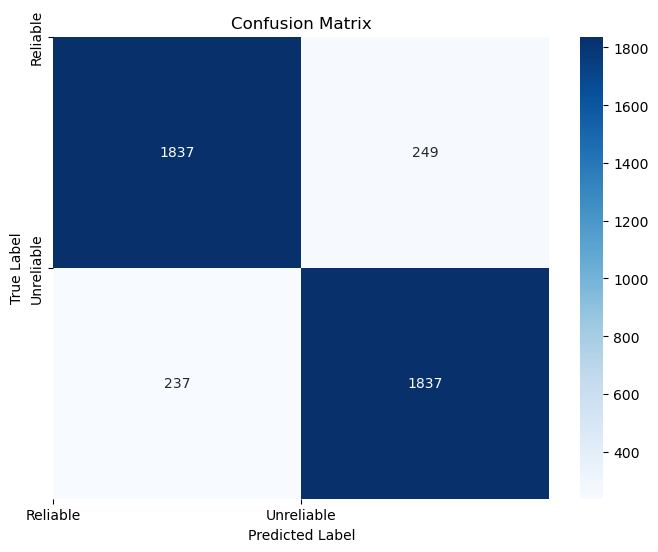

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, prediction)

# Plot confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')  # 'g' ensures integer format for annotations
plt.title("Confusion Matrix")
plt.xticks(range(2), ['Reliable', 'Unreliable'])
plt.yticks(range(2), ['Reliable', 'Unreliable'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

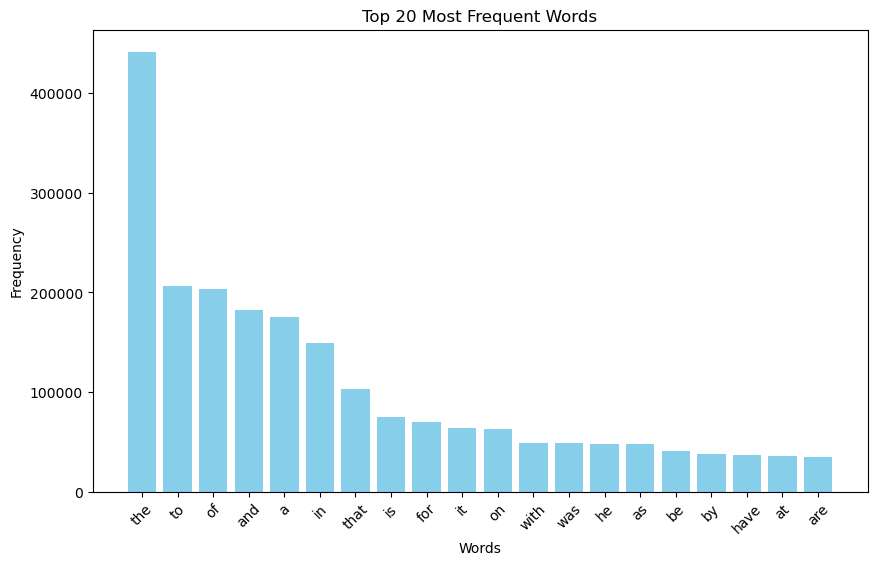

In [34]:
from collections import Counter

# Process a subset of data
subset_df = df.sample(frac=0.5)  # Adjust fraction as needed

# Tokenize all texts and count word frequencies
words = ' '.join(subset_df['text']).split()
word_counts = Counter(words)

# Get top N most frequent words
top_n = 20
top_words = dict(word_counts.most_common(top_n))

# Plot bar plot for the top N most frequent words
plt.figure(figsize=(10, 6))
plt.bar(top_words.keys(), top_words.values(), color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words'.format(top_n))
plt.xticks(rotation=45)
plt.show()

In [35]:
#save the vectorizer

pickle.dump(vect, open('vector.pkl', 'wb'))

In [36]:
#save the model

pickle.dump(model, open('model.pkl', 'wb'))

In [37]:
#load the vectorizer

vector_form=pickle.load(open('vector.pkl', 'rb'))

In [38]:
# Load the model

load_model=pickle.load(open('model.pkl', 'rb'))

In [39]:
#define a function to predict fake news

def fake_news(news):
    news=stemming(news) #perform stemming on the news
    input_data=[news] 
    vector_form1=vector_form.transform(input_data) #transform the input data using the loaded vectorizer
    prediction = load_model.predict(vector_form1) #predict using the loaded model
    return prediction

In [40]:
#test the function with a sample news article

val=fake_news("""In these trying times, Jackie Mason is the Voice of Reason. [In this week’s exclusive clip for Breitbart News, Jackie discusses the looming threat of North Korea, and explains how President Donald Trump could win the support of the Hollywood left if the U. S. needs to strike first.  “If he decides to bomb them, the whole country will be behind him, because everybody will realize he had no choice and that was the only thing to do,” Jackie says. “Except the Hollywood left. They’ll get nauseous. ” “[Trump] could win the left over, they’ll fall in love with him in a minute. If he bombed them for a better reason,” Jackie explains. “Like if they have no transgender toilets. ” Jackie also says it’s no surprise that Hollywood celebrities didn’t support Trump’s strike on a Syrian airfield this month. “They were infuriated,” he says. “Because it might only save lives. That doesn’t mean anything to them. If it only saved the environment, or climate change! They’d be the happiest people in the world. ” Still, Jackie says he’s got nothing against Hollywood celebs. They’ve got a tough life in this country. Watch Jackie’s latest clip above.   Follow Daniel Nussbaum on Twitter: @dznussbaum """)

In [41]:
#print the prediction

if val==[0]:
    print('reliable')
else:
    print('unreliable')

reliable


In [42]:
#Evaluating Model Performance with Different Metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, prediction)

# Precision
precision = precision_score(y_test, prediction)

# Recall
recall = recall_score(y_test, prediction)

# F1-score
f1 = f1_score(y_test, prediction)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8831730769230769
Precision: 0.8806327900287632
Recall: 0.8857280617164899
F1-score: 0.8831730769230769


In [43]:
#Trying other Machine Learning Algorithms for better Results

#Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier()

# Fit the model on the training data
rf_model.fit(x_train, y_train)

# Make predictions on the test data
rf_prediction = rf_model.predict(x_test)

# Calculate the accuracy of the model
rf_accuracy = rf_model.score(x_test, y_test)

# Print the accuracy
print("Random Forest Classifier Accuracy:", rf_accuracy)

Random Forest Classifier Accuracy: 0.9221153846153847


In [44]:
#Ensemble Methods (Using AdaBoost Classifier)

from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost Classifier
adaboost_model = AdaBoostClassifier()

# Fit the model on the training data
adaboost_model.fit(x_train, y_train)

# Make predictions on the test data
adaboost_prediction = adaboost_model.predict(x_test)

# Calculate the accuracy of the model
adaboost_accuracy = adaboost_model.score(x_test, y_test)

# Print the accuracy
print("AdaBoost Classifier Accuracy:", adaboost_accuracy)

C:\Users\DISHA\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier Accuracy: 0.9394230769230769


In [ ]:
# Using a Support Vector Machine (SVM)

from sklearn.svm import SVC
svc_model = SVC()  
svc_model.fit(x_train, y_train)
svc_prediction = svc_model.predict(x_test)
svc_accuracy = svc_model.score(x_test, y_test)
print("SVC Accuracy:", svc_accuracy)